<a href="https://colab.research.google.com/github/DayyalaPranay/DATA-ANALYSIS-USING-PYTHON/blob/main/2203A52013_DAUP_LAB_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom

In [ ]:
file_path = '/content/insurance.csv'
df = pd.read_csv(file_path)

In [ ]:
print(df.head())

   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


Probability of at least 4 smokers: 0.3504


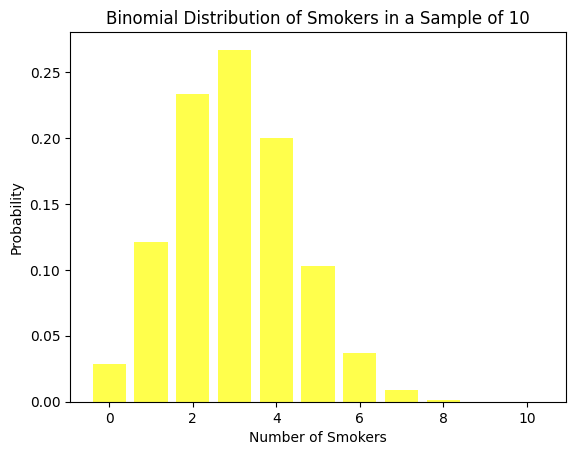

In [ ]:
p_smoker = 0.3
n_individuals = 10
prob_at_least_4 = 1 - binom.cdf(3, n_individuals, p_smoker)
print(f"Probability of at least 4 smokers: {prob_at_least_4:.4f}")
x = np.arange(0, n_individuals + 1)
y = binom.pmf(x, n_individuals, p_smoker)
plt.bar(x, y, color='YELLOW', alpha=0.7)
plt.xlabel('Number of Smokers')
plt.ylabel('Probability')
plt.title('Binomial Distribution of Smokers in a Sample of 10')
plt.show()

Probability of exactly 5 individuals with high expenses: 0.1032
Cumulative probability of at most 5 individuals: 0.9389


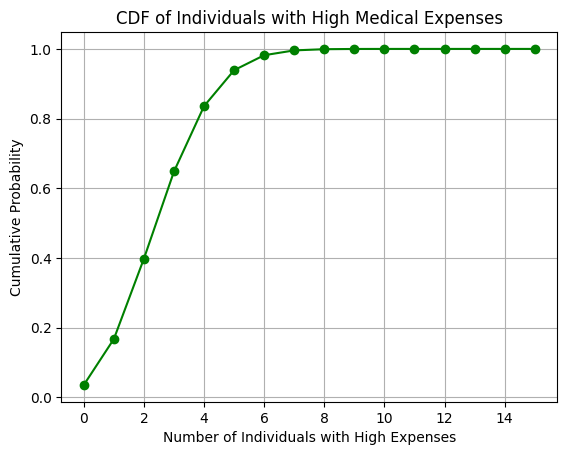

In [ ]:
p_high_expense = 0.2
n_expense = 15
prob_exact_5 = binom.pmf(5, n_expense, p_high_expense)
print(f"Probability of exactly 5 individuals with high expenses: {prob_exact_5:.4f}")
prob_at_most_5 = binom.cdf(5, n_expense, p_high_expense)
print(f"Cumulative probability of at most 5 individuals: {prob_at_most_5:.4f}")
x_exp = np.arange(0, n_expense + 1)
y_exp = binom.cdf(x_exp, n_expense, p_high_expense)
plt.plot(x_exp, y_exp, marker='o', linestyle='-', color='GREEN')
plt.xlabel('Number of Individuals with High Expenses')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Individuals with High Medical Expenses')
plt.grid()
plt.show()

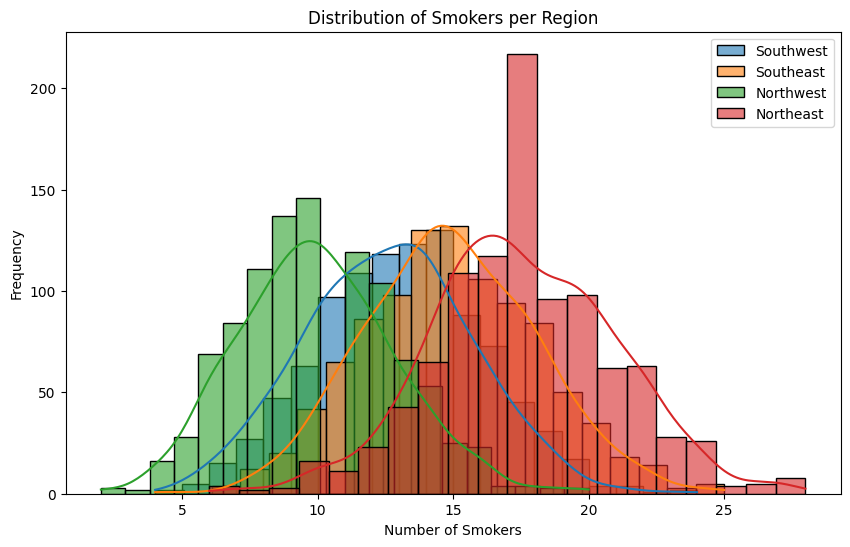

Expected number of smokers per region:
Southwest: 12.5
Southeast: 15.0
Northwest: 10.0
Northeast: 17.5


In [ ]:
regions = {'Southwest': 0.25, 'Southeast': 0.3, 'Northwest': 0.2, 'Northeast': 0.35}
n_samples = 1000
n_individuals = 5
simulations = {region: np.random.binomial(n_individuals, p, n_samples) for region, p in regions.items()}
plt.figure(figsize=(10, 6))
for region, data in simulations.items():
    sns.histplot(data, kde=True, label=region, bins=20, alpha=0.6)
plt.xlabel('Number of Smokers')
plt.ylabel('Frequency')
plt.title('Distribution of Smokers per Region')
plt.legend()
plt.show()
expected_values = {region: n_individuals * p for region, p in regions.items()}
print("Expected number of smokers per region:")
for region, expected in expected_values.items():
    print(f"{region}: {expected}")

Threshold for high-risk classification: 5.0
Probability of 8 high-risk individuals: 0.0058


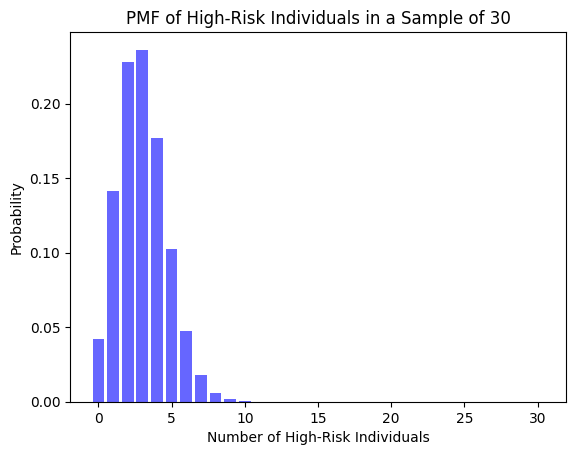

In [ ]:
q_threshold = binom.ppf(0.9, 30, 0.1)
print(f"Threshold for high-risk classification: {q_threshold}")
prob_8_high_risk = binom.pmf(8, 30, 0.1)
print(f"Probability of 8 high-risk individuals: {prob_8_high_risk:.4f}")
x_risk = np.arange(0, 30 + 1)
y_risk = binom.pmf(x_risk, 30, 0.1)
plt.bar(x_risk, y_risk, color='BLUE', alpha=0.6)
plt.xlabel('Number of High-Risk Individuals')
plt.ylabel('Probability')
plt.title('PMF of High-Risk Individuals in a Sample of 30')
plt.show()

Probability of at least 5 having more than 3 children: 0.5618


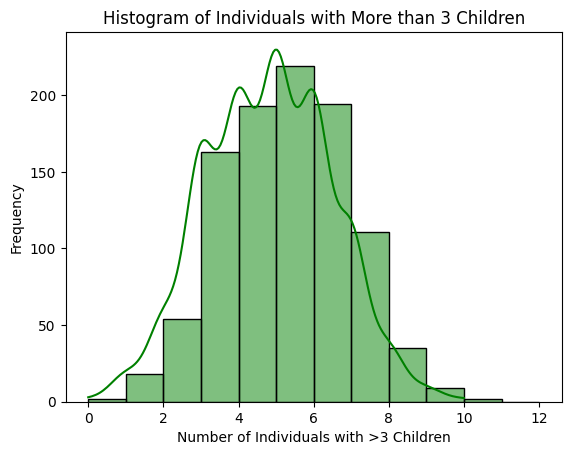

Simulated Mean: 4.80, Theoretical Mean: 4.80
Simulated Variance: 2.78, Theoretical Variance: 2.88


In [ ]:
p_children = 0.4
n_children = 12
prob_at_least_5 = 1 - binom.cdf(4, n_children, p_children)
print(f"Probability of at least 5 having more than 3 children: {prob_at_least_5:.4f}")
simulated_children = np.random.binomial(n_children, p_children, 1000)
sns.histplot(simulated_children, bins=range(n_children+1), kde=True, color='green')
plt.xlabel('Number of Individuals with >3 Children')
plt.ylabel('Frequency')
plt.title('Histogram of Individuals with More than 3 Children')
plt.show()
sim_mean = np.mean(simulated_children)
sim_var = np.var(simulated_children)
theoretical_mean = n_children * p_children
theoretical_var = n_children * p_children * (1 - p_children)
print(f"Simulated Mean: {sim_mean:.2f}, Theoretical Mean: {theoretical_mean:.2f}")
print(f"Simulated Variance: {sim_var:.2f}, Theoretical Variance: {theoretical_var:.2f}")